# Computational Drug Discovery

In [1]:
pip install rdkit-pypi

Note: you may need to restart the kernel to use updated packages.


In [2]:

pip install chembl_webresource_client


Note: you may need to restart the kernel to use updated packages.


In [96]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
import seaborn as sns
sns.set(style='ticks')
%matplotlib inline
from chembl_webresource_client.new_client import new_client

In [6]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from operator import itemgetter


# Download biological data

# Search for Target protein

In [8]:
# Target search for protein kinase CDK9/cyclin T1
target = new_client.target
target_query = target.search('CDK9/cyclin T1')
targets = pd.DataFrame.from_dict(target_query)
targets
     

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,CDK9/cyclin T1,34.0,False,CHEMBL2111389,"[{'accession': 'O60563', 'component_descriptio...",PROTEIN COMPLEX,9606.0
1,"[{'xref_id': 'O60563', 'xref_name': None, 'xre...",Homo sapiens,Cyclin T1,27.0,False,CHEMBL2108,"[{'accession': 'O60563', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Mus musculus,Cyclin-dependent kinase 9,23.0,False,CHEMBL4105875,"[{'accession': 'Q99J95', 'component_descriptio...",SINGLE PROTEIN,10090.0
3,[],Homo sapiens,CDK9/Cyclin K,21.0,False,CHEMBL3038475,"[{'accession': 'P50750', 'component_descriptio...",PROTEIN COMPLEX,9606.0
4,[],Homo sapiens,Cyclin-T1/Cyclin-dependent-like kinase 5,21.0,False,CHEMBL3885549,"[{'accession': 'Q00535', 'component_descriptio...",PROTEIN COMPLEX,9606.0
...,...,...,...,...,...,...,...,...,...
161,[],Homo sapiens,AKT/p21CIP1,5.0,False,CHEMBL3038463,"[{'accession': 'P38936', 'component_descriptio...",PROTEIN COMPLEX,9606.0
162,[],Homo sapiens,E3 ubiquitin-protein ligase Mdm2/CDK6,5.0,False,CHEMBL4523718,"[{'accession': 'Q00987', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
163,[],Homo sapiens,Baculoviral IAP repeat-containing protein 2/Cy...,5.0,False,CHEMBL4630748,"[{'accession': 'P11802', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
164,[],Homo sapiens,Baculoviral IAP repeat-containing protein 2/Cy...,5.0,False,CHEMBL4630749,"[{'accession': 'Q00534', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0


In [9]:
targets.shape

(166, 9)

# Select and retrieve bioactivity data for CDK9/cyclin T1 (first entry)


In [10]:

selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2111389'

In [11]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)

In [12]:
df.

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1780370,[],CHEMBL912442,Inhibition of CDK9/Cyclin T1 in presence of 10...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,uM,UO_0000065,None,15.0
1,None,1780380,[],CHEMBL912442,Inhibition of CDK9/Cyclin T1 in presence of 10...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,uM,UO_0000065,None,5.6
2,None,1780388,[],CHEMBL912442,Inhibition of CDK9/Cyclin T1 in presence of 10...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,uM,UO_0000065,None,12.4
3,None,1780400,[],CHEMBL912442,Inhibition of CDK9/Cyclin T1 in presence of 10...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,uM,UO_0000065,None,1.5
4,None,1780406,[],CHEMBL912442,Inhibition of CDK9/Cyclin T1 in presence of 10...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,uM,UO_0000065,None,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,None,24420565,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5048667,Inhibition of full length N-terminal GST fused...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,nM,UO_0000065,None,85.0
1289,None,24420566,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5048667,Inhibition of full length N-terminal GST fused...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,nM,UO_0000065,None,239.0
1290,None,24420567,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5048667,Inhibition of full length N-terminal GST fused...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,nM,UO_0000065,None,280.0
1291,None,24420568,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5048667,Inhibition of full length N-terminal GST fused...,B,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,CDK9/cyclin T1,9606,None,None,IC50,nM,UO_0000065,None,127.0


In [13]:
df.to_csv('CDK9_data.csv', index=False)

# Handling missing data

In [14]:

#Drop rows missing standard value
df = df[df.standard_value.notna()]
df.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 1292
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           0 non-null      object 
 1   activity_id                1264 non-null   int64  
 2   activity_properties        1264 non-null   object 
 3   assay_chembl_id            1264 non-null   object 
 4   assay_description          1264 non-null   object 
 5   assay_type                 1264 non-null   object 
 6   assay_variant_accession    0 non-null      object 
 7   assay_variant_mutation     0 non-null      object 
 8   bao_endpoint               1264 non-null   object 
 9   bao_format                 1264 non-null   object 
 10  bao_label                  1264 non-null   object 
 11  canonical_smiles           1264 non-null   object 
 12  data_validity_comment      5 non-null      object 
 13  data_validity_description  5 non-null      objec

# Data pre-processing of the bioactivity data

In [17]:
df['standard_value'].astype(float).describe()

count       1264.000000
mean        6641.213592
std        52052.830946
min            0.400000
25%           49.750000
50%          240.000000
75%         5000.000000
max      1000000.000000
Name: standard_value, dtype: float64

### Labeling compounds as either being active, inactive or intermediate

The bioactivity data is in the IC50 unit. Compounds having values of less than 100 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 100 and 5,000 nM will be referred to as intermediate.

In [18]:
for index, row in df.iterrows():
  if float(row["standard_value"]) >= 5000:
    df.at[index, "bioactivity_class"] = "inactive"
  elif float(row["standard_value"]) <= 100:
    df.at[index, "bioactivity_class"] = "active"
  else:
    df.at[index, "bioactivity_class"] = "intermediate"

/var/folders/dc/50yb2v4146x6fhlxtw9cn71w0000gn/T/ipykernel_6235/1906760522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, "bioactivity_class"] = "inactive"


In [19]:
df2 = df[['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value']].copy()

In [20]:
df2

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL384625,Nc1n[nH]c(N)c1/N=N/c1ccccc1,inactive,15000.0
1,CHEMBL387068,Nc1n[nH]c(N)c1/N=N/c1ccccc1[N+](=O)[O-],inactive,5600.0
2,CHEMBL217734,Nc1n[nH]c(N)c1/N=N/c1cccc([N+](=O)[O-])c1,inactive,12400.0
3,CHEMBL214475,Nc1n[nH]c(N)c1/N=N/c1cccc(O)c1,intermediate,1500.0
4,CHEMBL215205,Nc1n[nH]c(N)c1/N=N/c1ccc(O)cc1,intermediate,350.0
...,...,...,...,...
1288,CHEMBL5080361,CC(C)c1cc(Nc2cc3nc([C@](C)(O)C4CCN(C)CC4)ccc3c...,active,85.0
1289,CHEMBL5070707,CC(C)Oc1cc(Nc2cc3nc([C@](C)(O)C4CCN(C)CC4)ccc3...,intermediate,239.0
1290,CHEMBL5087911,CN1CCC([C@@](C)(O)c2ccc3cnc(Nc4cc(C(F)(F)F)c(C...,intermediate,280.0
1291,CHEMBL5077028,CN1CCC([C@@](C)(O)c2ccc3cnc(Nc4cc(N5CC6CCC(C5)...,intermediate,127.0


# Calculate Lipinski descriptors

In [21]:
#converts smiles to molecules and add molecule column to dataframe
PandasTools.AddMoleculeColumnToFrame(df2, 'canonical_smiles', 'Molecule', includeFingerprints=True)
df2.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,Molecule
0,CHEMBL384625,Nc1n[nH]c(N)c1/N=N/c1ccccc1,inactive,15000.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3370>
1,CHEMBL387068,Nc1n[nH]c(N)c1/N=N/c1ccccc1[N+](=O)[O-],inactive,5600.0,<rdkit.Chem.rdchem.Mol object at 0x1460c38b0>
2,CHEMBL217734,Nc1n[nH]c(N)c1/N=N/c1cccc([N+](=O)[O-])c1,inactive,12400.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3990>
3,CHEMBL214475,Nc1n[nH]c(N)c1/N=N/c1cccc(O)c1,intermediate,1500.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3bc0>
4,CHEMBL215205,Nc1n[nH]c(N)c1/N=N/c1ccc(O)cc1,intermediate,350.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3d80>


In [22]:
df2["MW"] = df2["Molecule"].map(lambda x: Descriptors.MolWt(x))
df2["LogP"] = df2["Molecule"].map(lambda x: Descriptors.MolLogP(x))
df2["NumHDonors"] = df2["Molecule"].map(lambda x: Lipinski.NumHDonors(x))
df2["NumHAcceptors"] = df2["Molecule"].map(lambda x: Lipinski.NumHAcceptors(x))

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,Molecule,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL384625,Nc1n[nH]c(N)c1/N=N/c1ccccc1,inactive,15000.0,,202.221,1.98950,3,5
1,CHEMBL387068,Nc1n[nH]c(N)c1/N=N/c1ccccc1[N+](=O)[O-],inactive,5600.0,,247.218,1.89770,3,7
2,CHEMBL217734,Nc1n[nH]c(N)c1/N=N/c1cccc([N+](=O)[O-])c1,inactive,12400.0,,247.218,1.89770,3,7
3,CHEMBL214475,Nc1n[nH]c(N)c1/N=N/c1cccc(O)c1,intermediate,1500.0,,218.220,1.69510,4,6
4,CHEMBL215205,Nc1n[nH]c(N)c1/N=N/c1ccc(O)cc1,intermediate,350.0,,218.220,1.69510,4,6
...,...,...,...,...,...,...,...,...,...
1288,CHEMBL5080361,CC(C)c1cc(Nc2cc3nc([C@](C)(O)C4CCN(C)CC4)ccc3c...,active,85.0,,447.558,5.05688,2,6
1289,CHEMBL5070707,CC(C)Oc1cc(Nc2cc3nc([C@](C)(O)C4CCN(C)CC4)ccc3...,intermediate,239.0,,463.557,4.72068,2,7
1290,CHEMBL5087911,CN1CCC([C@@](C)(O)c2ccc3cnc(Nc4cc(C(F)(F)F)c(C...,intermediate,280.0,,473.474,4.95228,2,6
1291,CHEMBL5077028,CN1CCC([C@@](C)(O)c2ccc3cnc(Nc4cc(N5CC6CCC(C5)...,intermediate,127.0,,516.621,4.30108,2,8

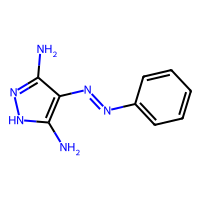
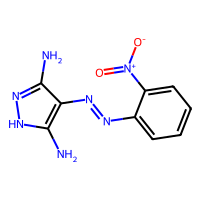
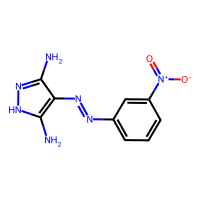
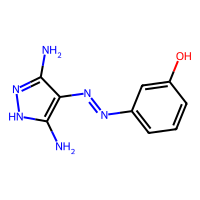
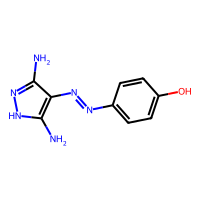
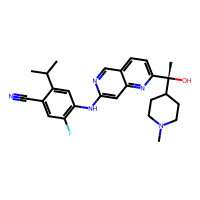
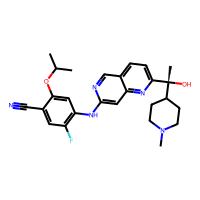
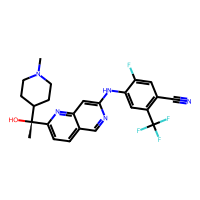
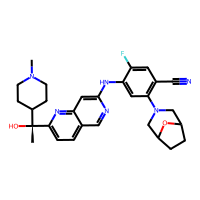
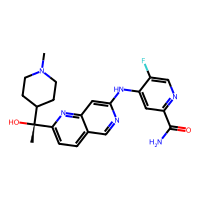

In [23]:
df2

In [98]:
active_compounds = df2[df2["bioactivity_class"]=='active'].drop(columns=['bioactivity_class', 'Molecule'])
active_compounds.to_csv('active_CDK9_compounds.csv')

# Convert IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [24]:
df2["standard_norm"] = df2["standard_value"]
for index, row in df.iterrows():
  if float(row["standard_value"]) > 100000000:
    df2.at[index, "standard_norm"] = 100000000

In [25]:
df2['pIC50']=df2['standard_norm'].transform(lambda x: float(x)*(10**-9)).transform(lambda x: -np.log10(x))

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,Molecule,MW,LogP,NumHDonors,NumHAcceptors,standard_norm,pIC50
0,CHEMBL384625,Nc1n[nH]c(N)c1/N=N/c1ccccc1,inactive,15000.0,,202.221,1.98950,3,5,15000.0,4.823909
1,CHEMBL387068,Nc1n[nH]c(N)c1/N=N/c1ccccc1[N+](=O)[O-],inactive,5600.0,,247.218,1.89770,3,7,5600.0,5.251812
2,CHEMBL217734,Nc1n[nH]c(N)c1/N=N/c1cccc([N+](=O)[O-])c1,inactive,12400.0,,247.218,1.89770,3,7,12400.0,4.906578
3,CHEMBL214475,Nc1n[nH]c(N)c1/N=N/c1cccc(O)c1,intermediate,1500.0,,218.220,1.69510,4,6,1500.0,5.823909
4,CHEMBL215205,Nc1n[nH]c(N)c1/N=N/c1ccc(O)cc1,intermediate,350.0,,218.220,1.69510,4,6,350.0,6.455932
...,...,...,...,...,...,...,...,...,...,...,...
1288,CHEMBL5080361,CC(C)c1cc(Nc2cc3nc([C@](C)(O)C4CCN(C)CC4)ccc3c...,active,85.0,,447.558,5.05688,2,6,85.0,7.070581
1289,CHEMBL5070707,CC(C)Oc1cc(Nc2cc3nc([C@](C)(O)C4CCN(C)CC4)ccc3...,intermediate,239.0,,463.557,4.72068,2,7,239.0,6.621602
1290,CHEMBL5087911,CN1CCC([C@@](C)(O)c2ccc3cnc(Nc4cc(C(F)(F)F)c(C...,intermediate,280.0,,473.474,4.95228,2,6,280.0,6.552842
1291,CHEMBL5077028,CN1CCC([C@@](C)(O)c2ccc3cnc(Nc4cc(N5CC6CCC(C5)...,intermediate,127.0,,516.621,4.30108,2,8,127.0,6.896196

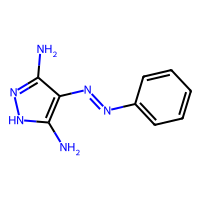
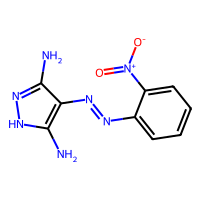
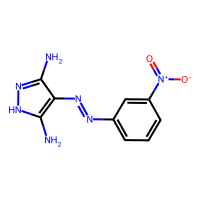
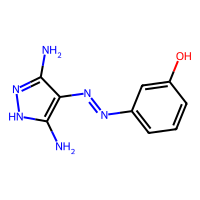
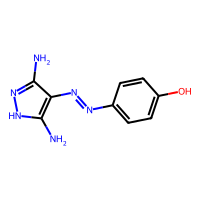
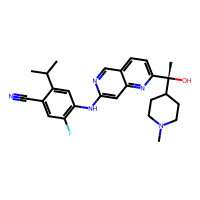
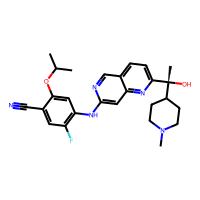
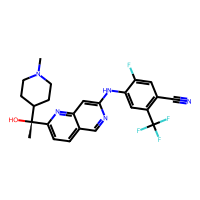
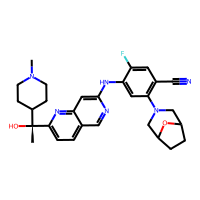
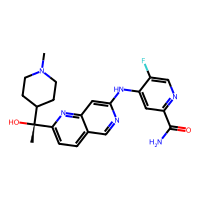

In [26]:
df2

In [27]:
df2.standard_norm.describe()

count      1264
unique      509
top       200.0
freq        167
Name: standard_norm, dtype: object

In [28]:
df2.pIC50.describe()

count    1264.000000
mean        6.442477
std         1.179028
min         3.000000
25%         5.301030
50%         6.619789
75%         7.303223
max         9.397940
Name: pIC50, dtype: float64

# Removing the 'intermediate' bioactivity class

In [29]:
df2_class = df2[df2.bioactivity_class != 'intermediate'].reset_index(drop=True)

In [30]:
df2_class

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,Molecule,MW,LogP,NumHDonors,NumHAcceptors,standard_norm,pIC50
0,CHEMBL384625,Nc1n[nH]c(N)c1/N=N/c1ccccc1,inactive,15000.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3370>,202.221,1.98950,3,5,15000.0,4.823909
1,CHEMBL387068,Nc1n[nH]c(N)c1/N=N/c1ccccc1[N+](=O)[O-],inactive,5600.0,<rdkit.Chem.rdchem.Mol object at 0x1460c38b0>,247.218,1.89770,3,7,5600.0,5.251812
2,CHEMBL217734,Nc1n[nH]c(N)c1/N=N/c1cccc([N+](=O)[O-])c1,inactive,12400.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3990>,247.218,1.89770,3,7,12400.0,4.906578
3,CHEMBL428639,Nc1n[nH]c(N)c1/N=N/c1ccccc1CO,inactive,26000.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3c30>,232.247,1.48180,4,6,26000.0,4.585027
4,CHEMBL411704,COc1ccnc2c1c(-c1ccnc(N)n1)c1ccnc(N)n12,active,26.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3ae0>,307.317,1.51250,2,8,26.0,7.585027
...,...,...,...,...,...,...,...,...,...,...,...
716,CHEMBL4786555,CC1(C)CNC[C@@H](Nc2ncc(C(F)(F)F)c(-c3c[nH]c4cc...,active,41.0,<rdkit.Chem.rdchem.Mol object at 0x1461fbca0>,389.425,4.44370,3,4,41.0,7.387216
717,CHEMBL4782954,CS(=O)(=O)c1c(C#N)ccc2c(-c3nc(N[C@H]4CCCNC4)nc...,active,60.0,<rdkit.Chem.rdchem.Mol object at 0x1461fbf40>,464.473,3.08278,3,7,60.0,7.221849
718,CHEMBL5088381,Cc1noc(C)c1-c1ccc2c(-c3nc(N[C@H]4CCCNC4)ncc3C(...,active,90.0,<rdkit.Chem.rdchem.Mol object at 0x1461fc190>,493.921,4.89624,3,7,90.0,7.045757
719,CHEMBL5084067,CC(C)N1CCN(Cc2ccc(Nc3ncc(F)c(-c4cn(C(C)C)c5ncc...,inactive,10000.0,<rdkit.Chem.rdchem.Mol object at 0x1461fc430>,488.615,4.87790,1,8,10000.0,5.000000


# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

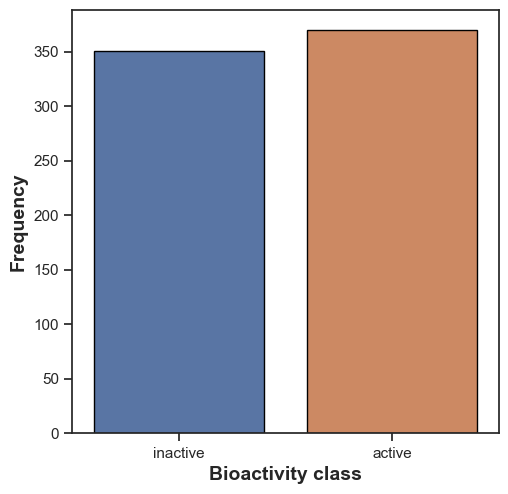

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df2_class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [32]:
# Scatter plot of MW versus LogP

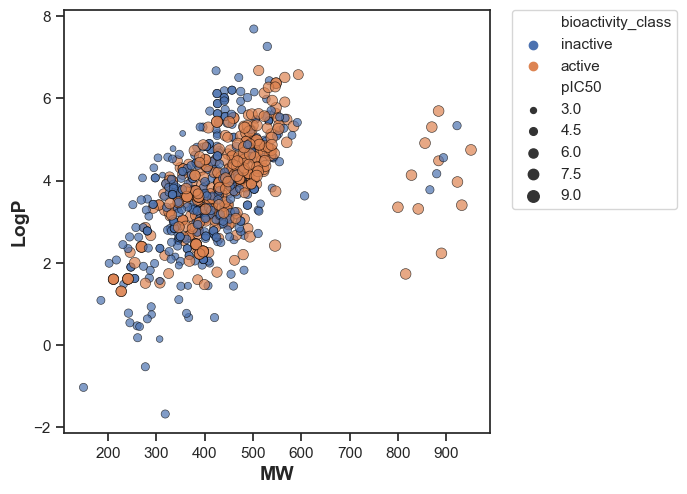

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df2_class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# pIC50 value

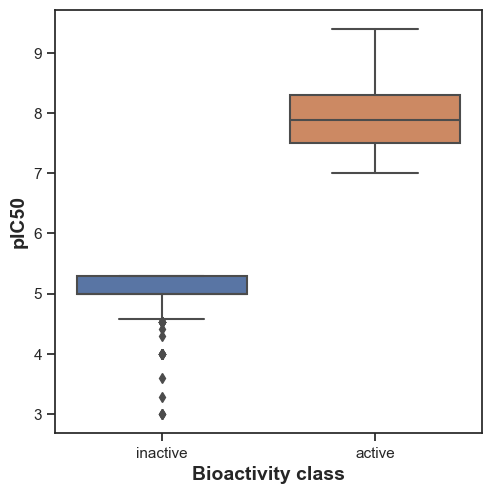

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

# Statistical analysis | Mann-Whitney U Test

In [35]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df2_class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df2_class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     


In [36]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,129870.0,2.927473e-120,0.05,Different distribution (reject H0)


# MW

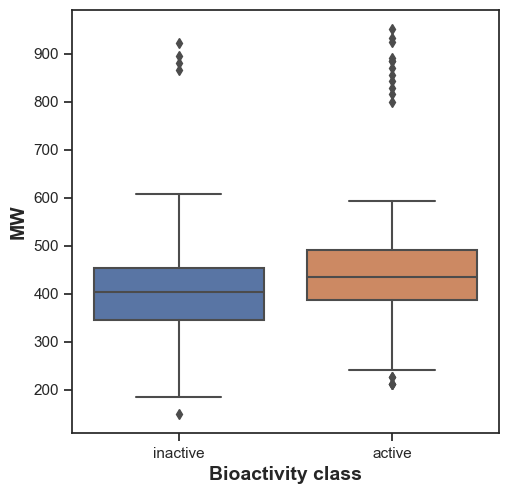

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [38]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,81230.5,5.562620e-09,0.05,Different distribution (reject H0)


# LogP

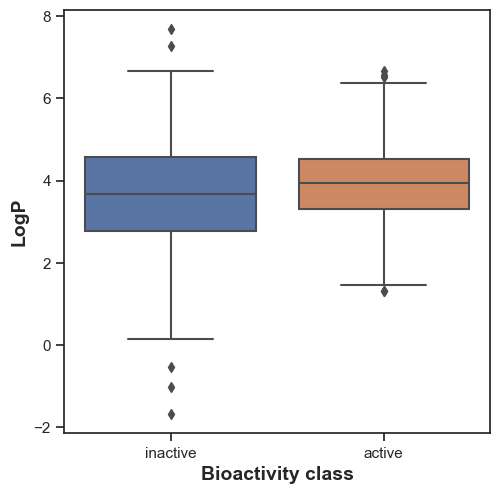

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [40]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,72166.0,0.009691,0.05,Different distribution (reject H0)


# NumHDonors

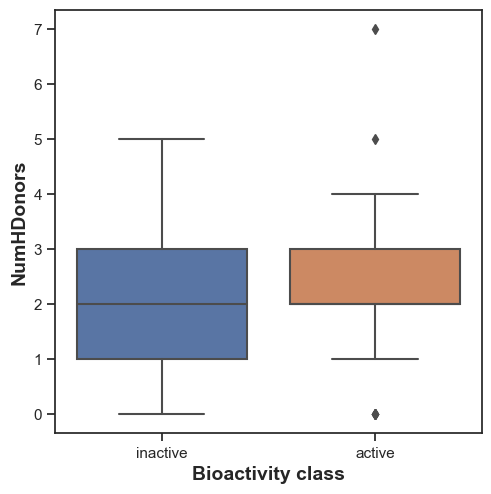

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [42]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,67583.5,0.321554,0.05,Same distribution (fail to reject H0)


# NumHAcceptors

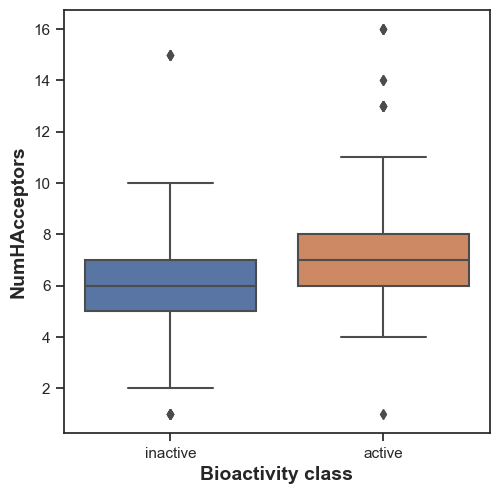

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [44]:

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,83738.0,8.952971e-12,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results

Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed *statistically significant difference*, which is to be expected since threshold values (IC50 < 100 nM = Actives while IC50 > 1000 nM = Inactives, corresponding to pIC50 > 7 = Actives and pIC50 < 5.5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only NumHDonors exhibited *no difference* between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows *statistically significant difference* between actives and inactives.

# Fingerprint

In [45]:
df2_class["Fingerprints"] = df2_class["Molecule"].map(lambda x: Chem.RDKFingerprint(x, maxPath=7,fpSize=512))

In [46]:
df2_class

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,Molecule,MW,LogP,NumHDonors,NumHAcceptors,standard_norm,pIC50,Fingerprints
0,CHEMBL384625,Nc1n[nH]c(N)c1/N=N/c1ccccc1,inactive,15000.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3370>,202.221,1.98950,3,5,15000.0,4.823909,"[1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, ..."
1,CHEMBL387068,Nc1n[nH]c(N)c1/N=N/c1ccccc1[N+](=O)[O-],inactive,5600.0,<rdkit.Chem.rdchem.Mol object at 0x1460c38b0>,247.218,1.89770,3,7,5600.0,5.251812,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, ..."
2,CHEMBL217734,Nc1n[nH]c(N)c1/N=N/c1cccc([N+](=O)[O-])c1,inactive,12400.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3990>,247.218,1.89770,3,7,12400.0,4.906578,"[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, ..."
3,CHEMBL428639,Nc1n[nH]c(N)c1/N=N/c1ccccc1CO,inactive,26000.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3c30>,232.247,1.48180,4,6,26000.0,4.585027,"[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ..."
4,CHEMBL411704,COc1ccnc2c1c(-c1ccnc(N)n1)c1ccnc(N)n12,active,26.0,<rdkit.Chem.rdchem.Mol object at 0x1460c3ae0>,307.317,1.51250,2,8,26.0,7.585027,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
716,CHEMBL4786555,CC1(C)CNC[C@@H](Nc2ncc(C(F)(F)F)c(-c3c[nH]c4cc...,active,41.0,<rdkit.Chem.rdchem.Mol object at 0x1461fbca0>,389.425,4.44370,3,4,41.0,7.387216,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
717,CHEMBL4782954,CS(=O)(=O)c1c(C#N)ccc2c(-c3nc(N[C@H]4CCCNC4)nc...,active,60.0,<rdkit.Chem.rdchem.Mol object at 0x1461fbf40>,464.473,3.08278,3,7,60.0,7.221849,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
718,CHEMBL5088381,Cc1noc(C)c1-c1ccc2c(-c3nc(N[C@H]4CCCNC4)ncc3C(...,active,90.0,<rdkit.Chem.rdchem.Mol object at 0x1461fc190>,493.921,4.89624,3,7,90.0,7.045757,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
719,CHEMBL5084067,CC(C)N1CCN(Cc2ccc(Nc3ncc(F)c(-c4cn(C(C)C)c5ncc...,inactive,10000.0,<rdkit.Chem.rdchem.Mol object at 0x1461fc430>,488.615,4.87790,1,8,10000.0,5.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [47]:
indices = range(len(df2_class['Fingerprints'][0]))

df3 = df2_class[['pIC50']].join(df2_class['Fingerprints'].transform({f'FP{i+1}': itemgetter(i) for i in indices}))


In [48]:
df3

,pIC50,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,FP503,FP504,FP505,FP506,FP507,FP508,FP509,FP510,FP511,FP512
0,4.823909,1,0,1,1,0,1,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1,5.251812,1,1,1,1,0,1,1,0,1,...,0,0,0,1,1,1,1,1,0,0
2,4.906578,1,0,1,1,0,1,1,0,1,...,0,0,0,1,1,1,1,0,0,0
3,4.585027,1,0,1,1,0,1,1,1,0,...,1,1,0,1,1,0,1,0,1,1
4,7.585027,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,7.387216,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
717,7.221849,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
718,7.045757,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
719,5.000000,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Modeling

In [49]:
X = df3.drop('pIC50', axis=1)

In [50]:
y=df3[['pIC50']]

# Remove low variance features

In [51]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [52]:
X.shape

(721, 25)

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

# Compare ML algorithms

# RF Model with hyperparameter tuning

In [72]:
rfr = RandomForestRegressor(random_state= 42)
grid_params = {
    'n_estimators': [100,500,1000],
    'max_depth': [20, 24, 28, 32]}

rf_grid_cv = GridSearchCV(estimator=rfr, scoring='r2', param_grid=grid_params, cv=3, verbose=0)

rf_result =rf_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score R-squared: {rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_va

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_va

Best Score R-squared: 0.44976475384912584
Best Hyperparameters: {'max_depth': 28, 'n_estimators': 1000}


In [73]:
rfr = RandomForestRegressor(random_state= 42)
grid_params = {
    'n_estimators': [100,500,1000],
    'max_depth': [20, 24, 28, 32]}

rf_grid_cv = GridSearchCV(estimator=rfr, scoring='neg_mean_squared_error', param_grid=grid_params, cv=3, verbose=0)

rf_result =rf_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score MSE: {-rf_result.best_score_}")
print(f"Best Hyperparameters: {rf_result.best_params_}")

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_va

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_va

Best Score MSE: 1.2554684899542357
Best Hyperparameters: {'max_depth': 28, 'n_estimators': 1000}


In [74]:
y_pred =rf_result.best_estimator_.predict(X_test)

In [75]:
r2_score(y_test, y_pred)

0.5884987588213293

In [76]:
mean_absolute_error(y_test, y_pred)

0.7194222051023587

In [77]:
mean_squared_error(y_test, y_pred)

0.9185763801795012

In [78]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
rf_neg_mae = cross_validate(rf_result.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linahrusere/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_va

In [79]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.7916709923133138, 0.05126627126078711)

In [80]:
mean_absolute_error(y_test, rf_result.predict(X_test))

0.7194222051023587

# Scatter Plot of Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

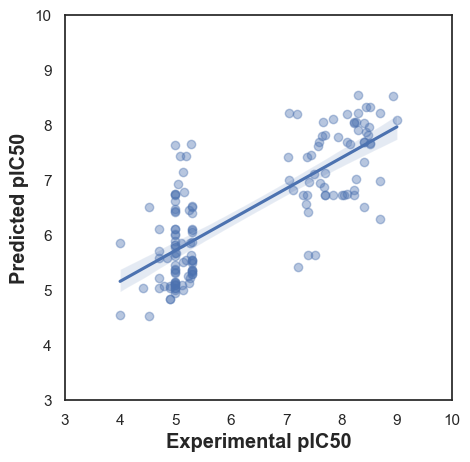

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test['pIC50'], y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(5, 5)
plt.show

# XGBoost Model with hyperparameter tuning

In [86]:
import xgboost as xgb
from xgboost import XGBRegressor

param_grid={"learning_rate": [0.01, 0.05, 0.10],
            "max_depth": [16, 20, 24],
            "min_child_weight": [ 1, 3, 5, 7],
            "reg_alpha":[10, 50],
            "gamma":[ 0.0, 0.1, 0.2],
            "colsample_bytree":[ 0.3, 0.4, 0.5],
            'n_estimators': [1000]}
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(), param_grid = param_grid,
            cv=3, scoring='r2', verbose=1, n_jobs=-1)

gsc.fit(X_train, y_train)

print("Best parameters:", gsc.best_params_)
print("R-squared: ", gsc.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 10}
R-squared:  0.36800909374305507


In [87]:
xgbbest_model = gsc.best_estimator_

In [88]:
y_te_pred =xgbbest_model.predict(X_test)

In [89]:
r2_score(y_test, y_te_pred)

0.39021593174048175

In [90]:
mean_absolute_error(y_test, y_te_pred)

0.9516637844919626

In [91]:
 mean_squared_error(y_test, y_te_pred)

1.3611945385840347

<function matplotlib.pyplot.show(close=None, block=None)>

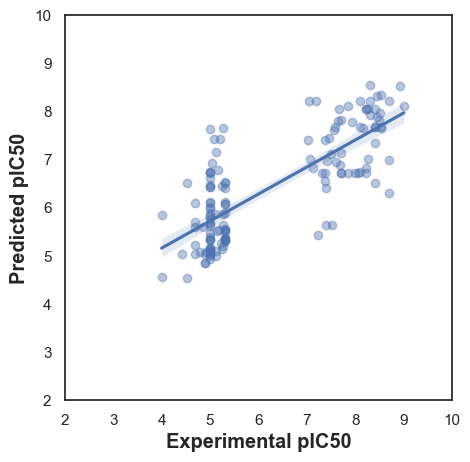

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test['pIC50'], y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 10)
ax.set_ylim(2, 10)
ax.figure.set_size_inches(5, 5)
plt.show